In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv("weightedX.csv")
Y=pd.read_csv("weightedY.csv")


In [3]:
x_val=X.values
y_val=Y.values

#Normalising the data

In [4]:
u=x_val.mean()
std=x_val.std()
x_val=(x_val-u)/std

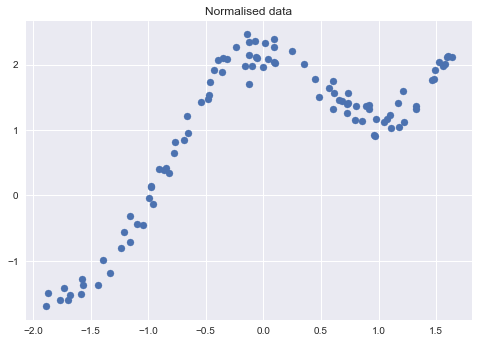

In [5]:
plt.style.use("seaborn")
plt.title("Normalised data")
plt.scatter(x_val,y_val)
plt.show()

#Computing W(mxm) diagonal matrix

In [6]:
def computeW(x,query_point,tau):
    m=x.shape[0]
    w=np.mat(np.eye(m))
    for i in range(m):
        w[i,i]=np.exp(np.dot(x[i]-query_point,(x[i]-query_point).T)/(-2*tau*tau))
    return w;    
    

In [7]:
x_val=np.mat(x_val)
y_val=np.mat(y_val)
w=computeW(x_val,-1,0.5)
print(w.shape)
print(w)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


#Making predictions

In [8]:
def predict(x,y,query,tau):
    m=x.shape[0]
    ones=np.ones((m,1))
    X_=np.hstack((x,ones))
    q=np.mat([query,1])
    w=computeW(X_,query,tau)
    #calculating theta from closed form solution inv(X'WX)*(X'WY)
    theta=np.linalg.pinv(X_.T*(w*X_))*(X_.T*(w*y))
    pred=np.dot(q,theta)
    return theta,pred

In [9]:
theta,pred=predict(x_val,y_val,1,1)

In [10]:
pred


matrix([[1.59417694]])

#VISUALISING THE PREDICTION AND ANALYSING THE EFFECT OF BANDWIDTH PARAMETER (TAU)

In [19]:
def plotpred(tau):
    #Generating testing data
    x_test=np.linspace(-2,2,20)
    y_test=[]
    for i in x_test:
        theta,pred=predict(x_val,y_val,i,tau)
        
        y_test.append(pred[0][0])
    #converting matrix back to numpy array so as to plot it using matplotlib    
    y_test=np.array(y_test)
    xo=np.array(x_val)
    yo=np.array(y_val)
    plt.scatter(xo,yo,label='original')
    plt.scatter(x_test,y_test,color='red',label='predicted')
    plt.title("Bandwidth parameter(tau) %.2f"%tau)
    plt.legend()
    plt.show()
    
    
    
        

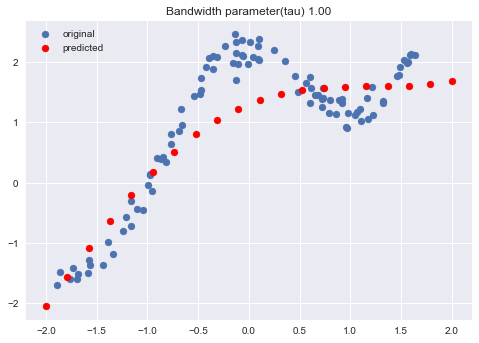

In [20]:
plotpred(1)

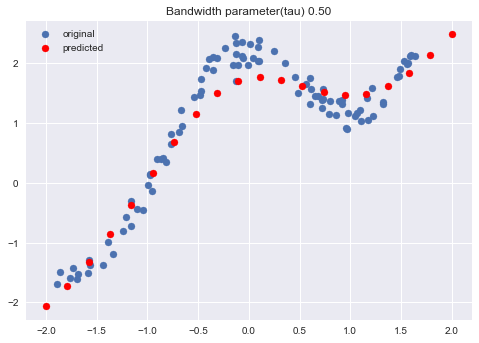

In [21]:
plotpred(0.5)

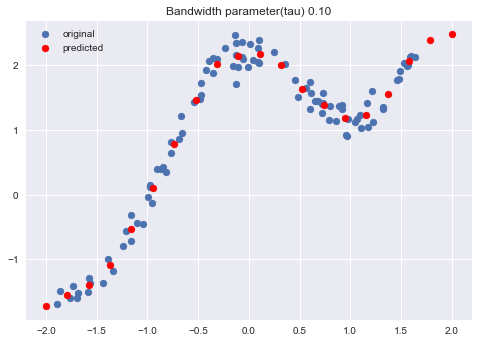

In [22]:
plotpred(0.1)

#AS WE CAN SEE WITH DECREASING THE VALUE OF BANDWIDTH PARAMETER , WE ARE GETTING HIGHER ACCURACY

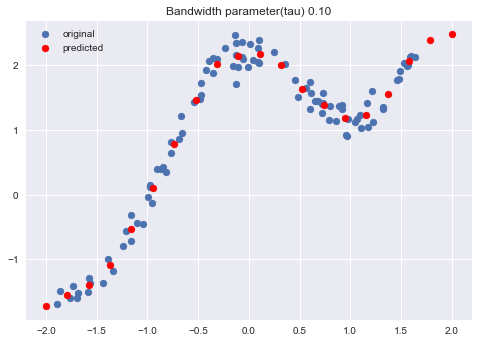

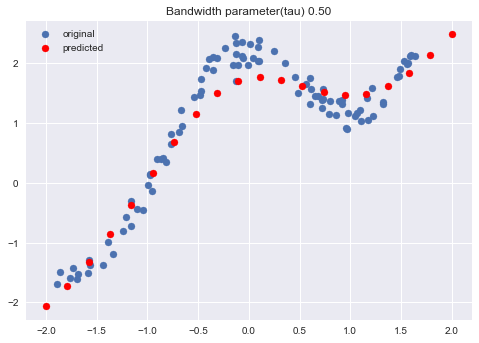

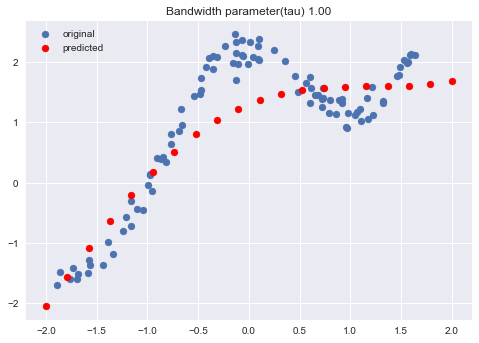

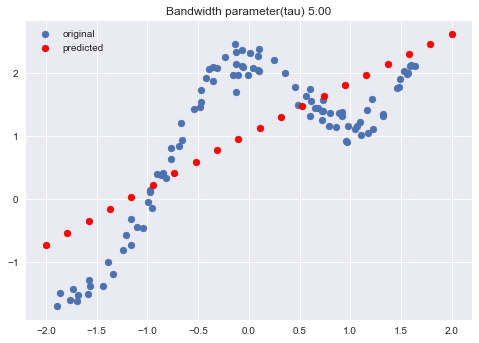

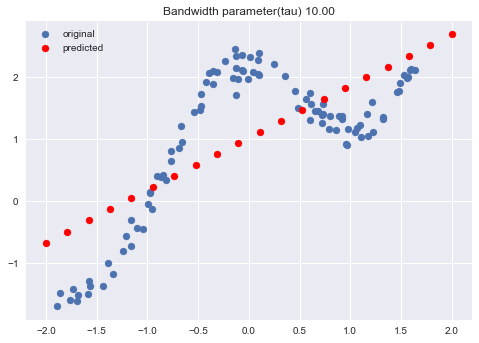

In [23]:
tau=[0.1,0.5,1,5,10]
for i in tau:
    plotpred(i)

#ON INCREASING THE BANWIDTH PARAMETER , WE CAN SEE THAT THE GRAPH IS SLOWLY BECOMING A LINEAR REGRESSION CURVE I.E A STRAIGHT LINE OF THE FORM Y=MX+C